In [ ]:
! curl https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data > telescope.csv

In [1]:
import pandas as pd 
telescope = pd.read_csv("telescope.csv")

In [2]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [ ]:
telescope.columns = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
display(telescope)

# Data Balancing 

In [ ]:
indexed_telescope = telescope.groupby('class')
telescope_group_g = indexed_telescope.get_group(name = "g")
telescope_group_h = indexed_telescope.get_group(name = "h")
display(telescope_group_g)
display(telescope_group_h)

In [5]:
minimum = len(telescope_group_h.index)
telescope_group_g = telescope_group_g.sample(n= minimum)
telescope_balanced = pd.concat([telescope_group_g, telescope_group_h], ignore_index=True)


In [ ]:
display(telescope_balanced)

# Preprocessing on the dataset here :

In [ ]:
#preprocess with minmax
def minmax(df):
    classes = df.iloc[:,-1:].values
    classes = [x[0] for x in classes]
    classes = pd.Series(classes, name='class')
    x = df.iloc[:, :-1].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.concat([pd.DataFrame(x_scaled), classes], axis=1)


In [37]:
#Z-normalization
def z_score(df):
    cols = list(df.columns)
    cols.remove("class")
    for col in cols:
        df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)
    return df

In [ ]:
telescope_balanced = minimax(telescope_balanced)

In [38]:
telescope_balanced = z_score(telescope_balanced)

# Splitting dataset to train and test sets

In [39]:
from sklearn.model_selection import train_test_split


x_data = telescope_balanced.drop('class',axis = 1)
y_label = telescope_balanced['class']
X_train,X_test,Y_train,Y_test = train_test_split(x_data,y_label,test_size=0.3,random_state=101)

# Visualization :

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb734ecf710>,
      dtype=object)

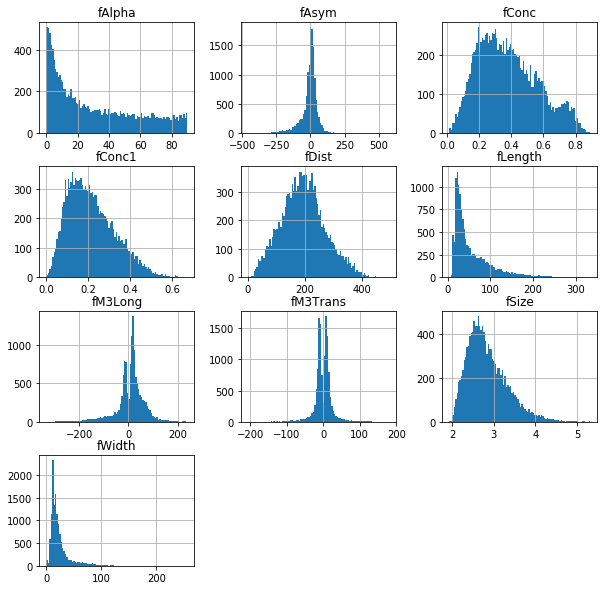

In [8]:
#histogram for each class features.
telescope_balanced.hist(bins=100, figsize = (10, 10))

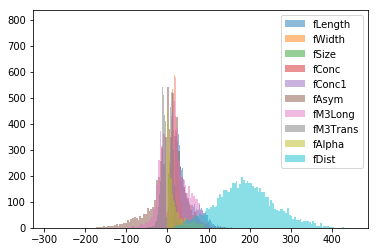

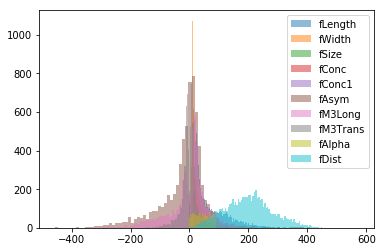

In [13]:
telescope_balanced_grouped = telescope_balanced.groupby('class')
# Histogram for each class with all it's features
for class_name, class_data in telescope_balanced_grouped:
    for feature in class_data:
        if feature != "class":
            plt.hist(class_data[feature], 100, alpha=0.5, label=feature)
    plt.legend(loc='upper right')
    plt.show()

g         Axes(0.1,0.15;0.363636x0.75)
h    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

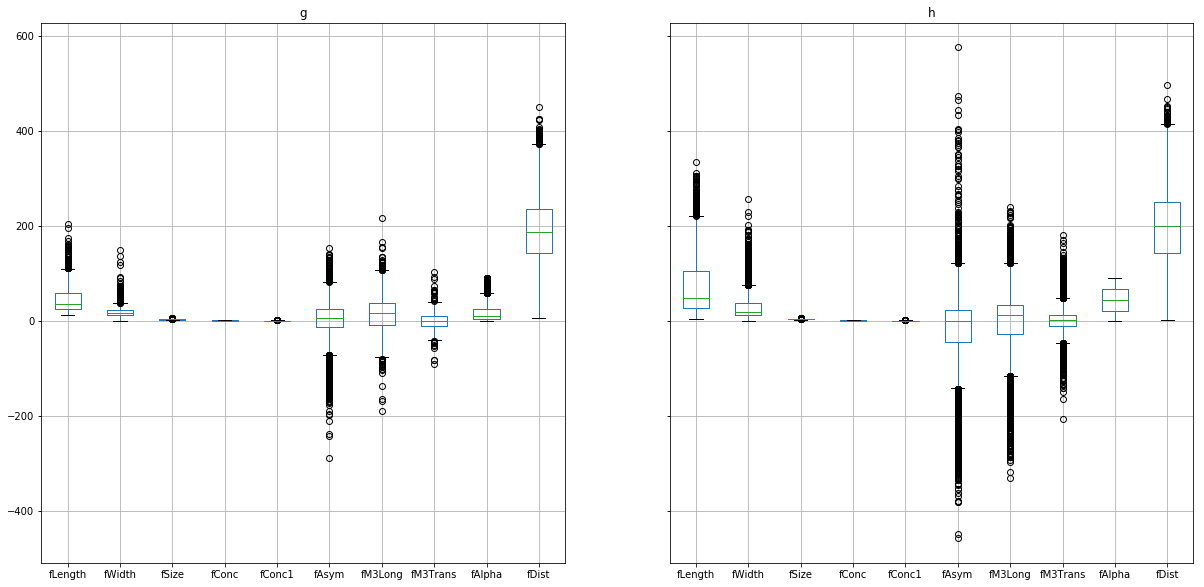

In [14]:
#Boxplots 
telescope_balanced_grouped.boxplot(figsize = (20, 10))

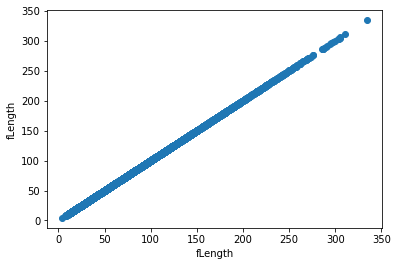

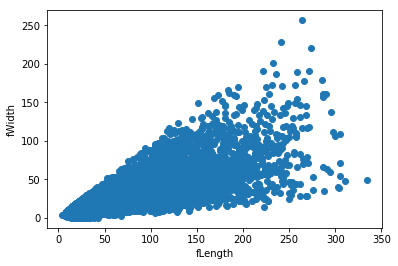

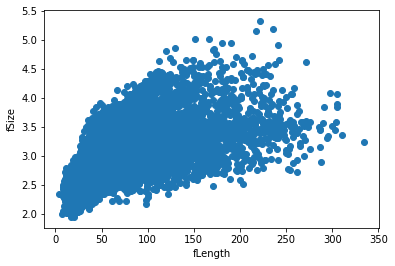

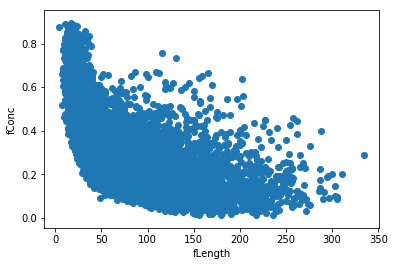

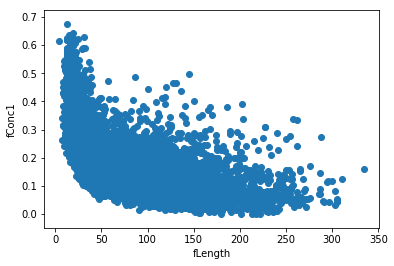

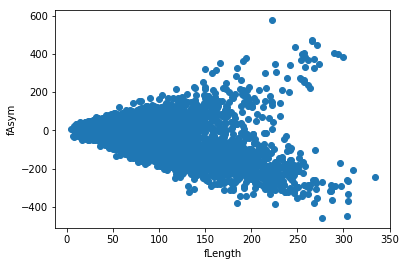

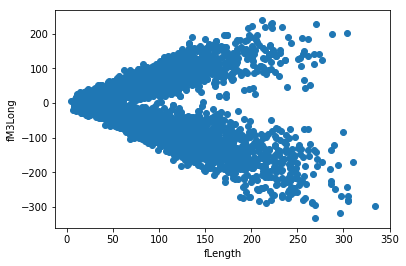

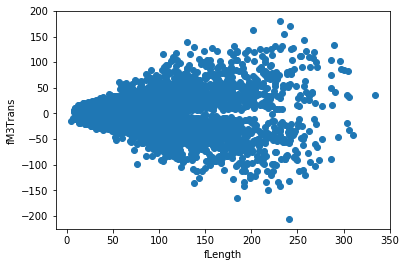

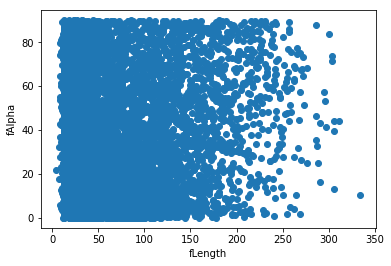

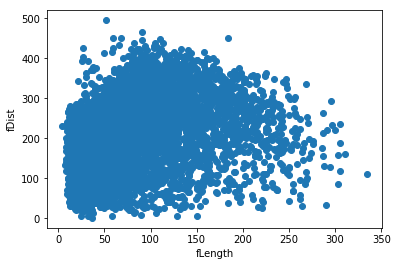

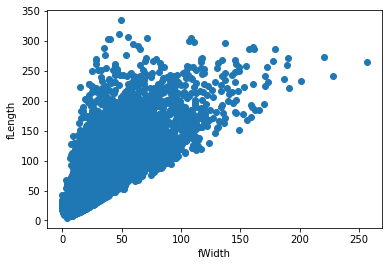

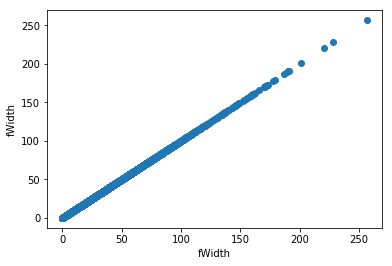

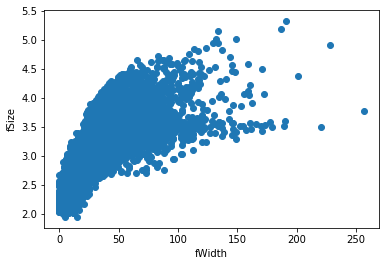

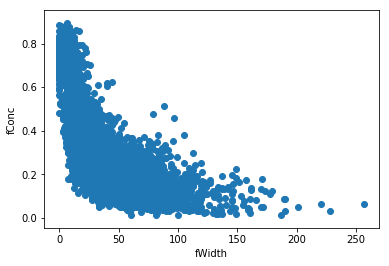

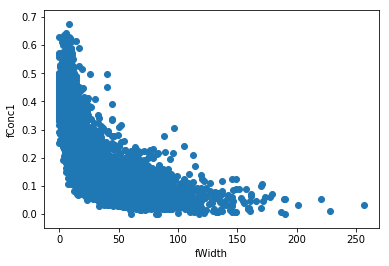

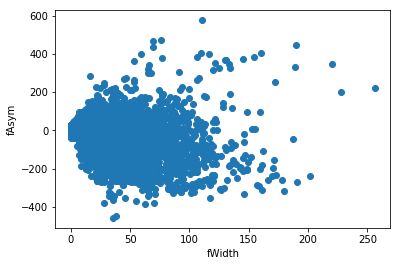

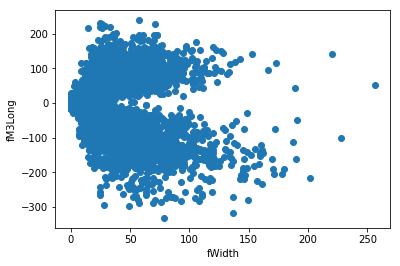

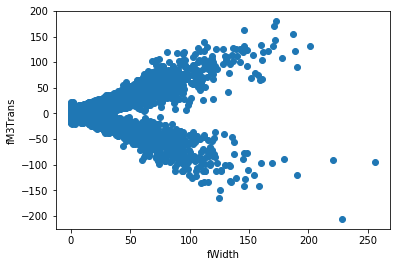

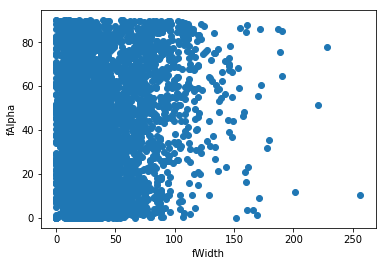

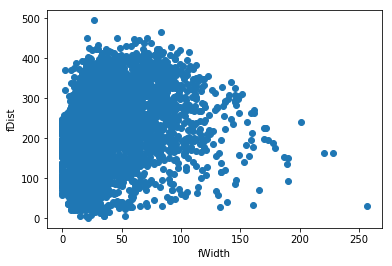

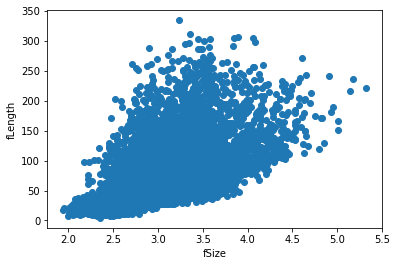

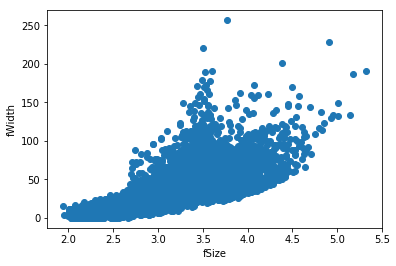

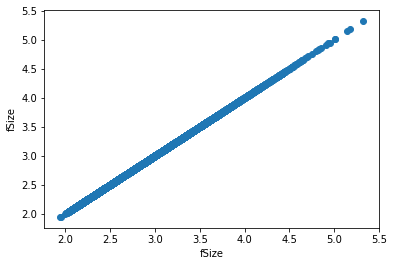

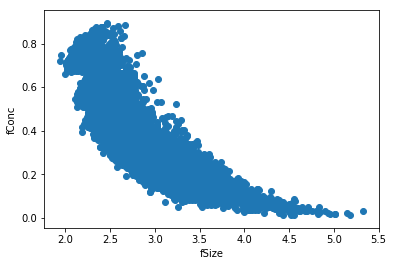

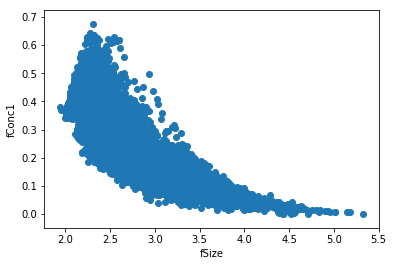

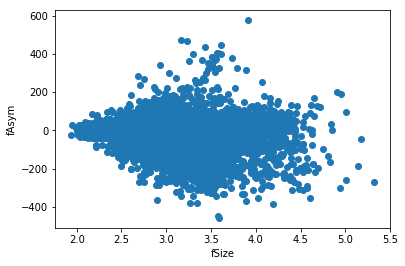

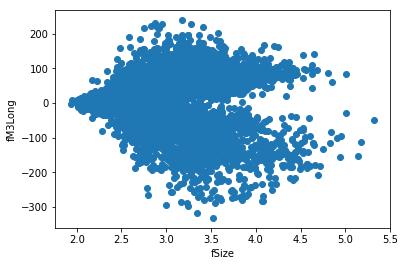

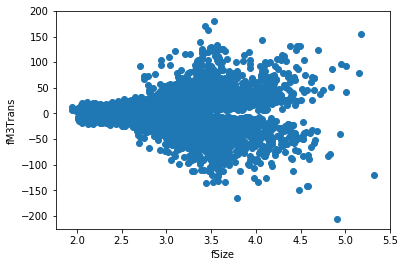

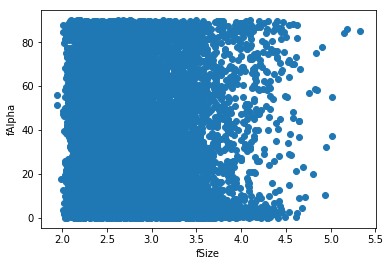

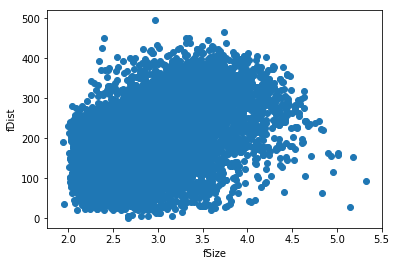

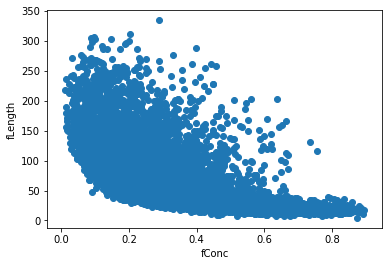

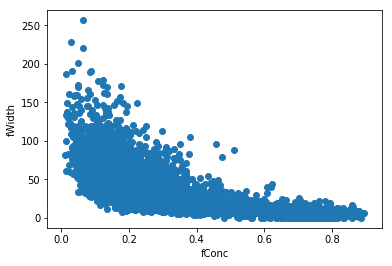

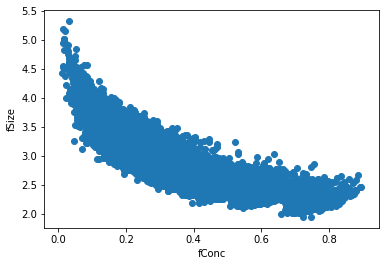

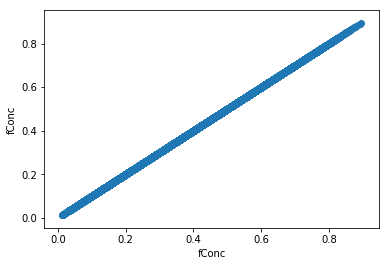

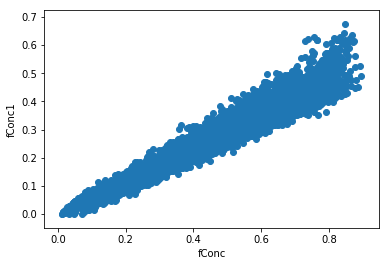

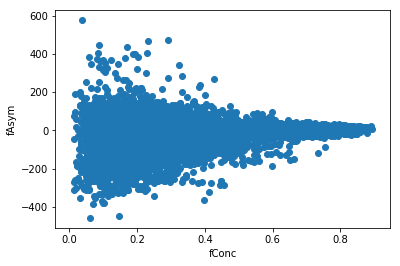

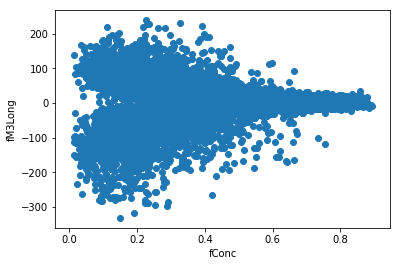

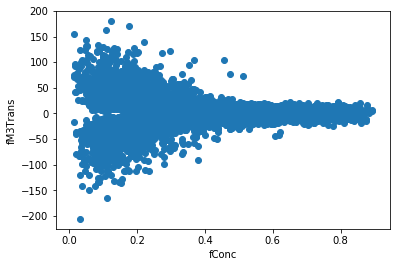

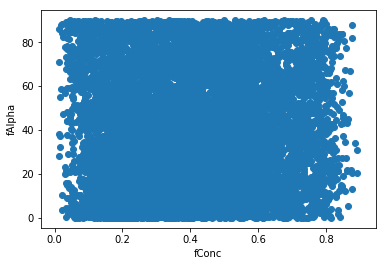

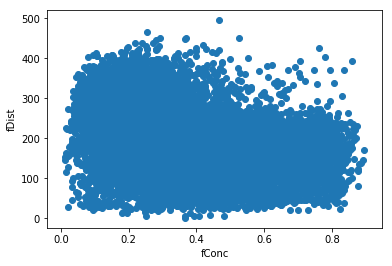

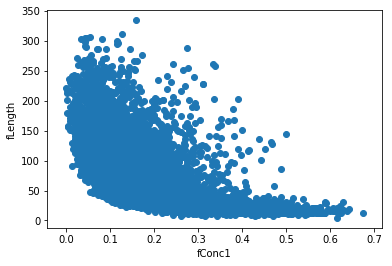

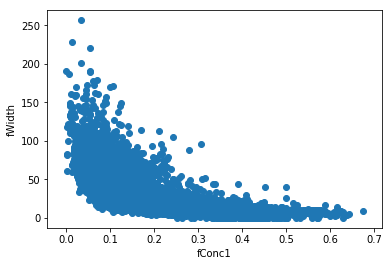

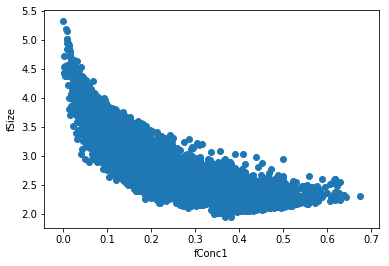

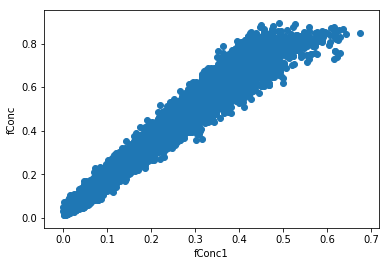

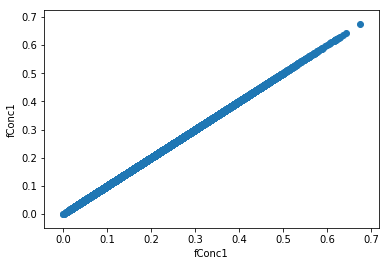

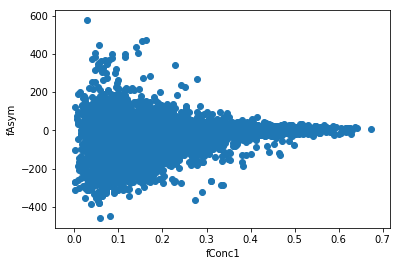

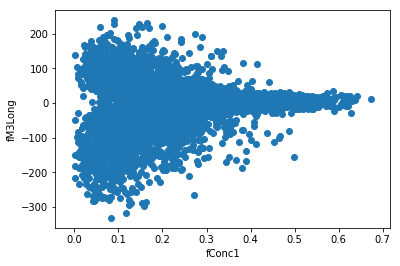

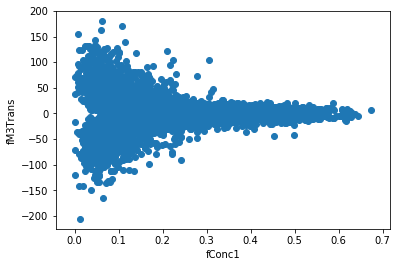

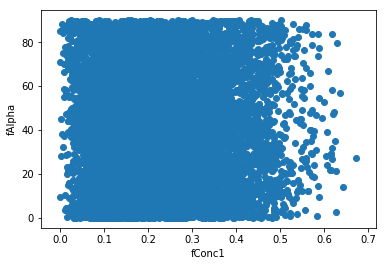

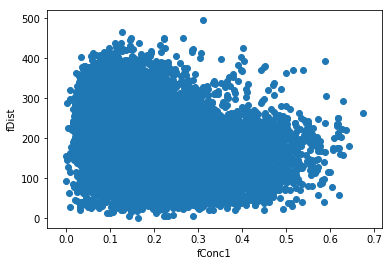

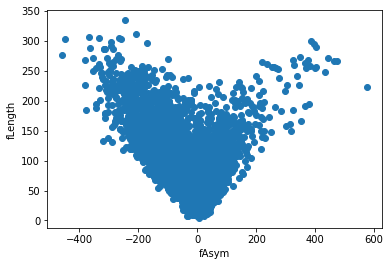

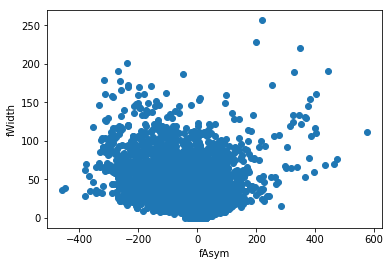

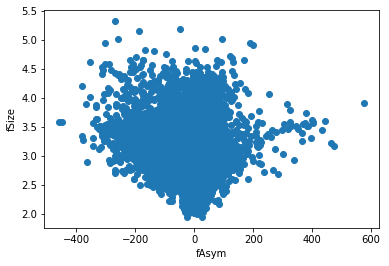

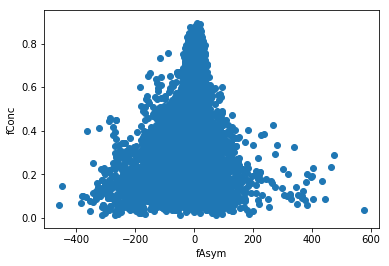

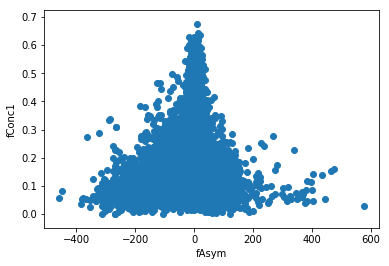

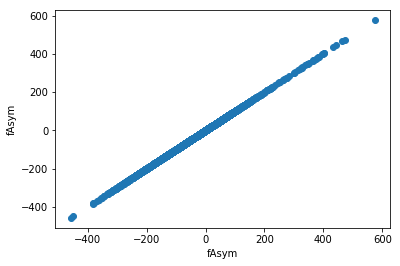

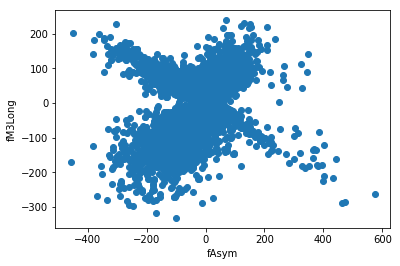

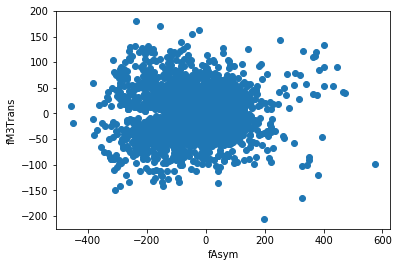

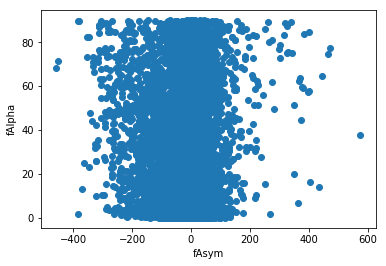

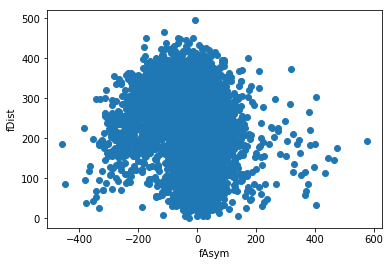

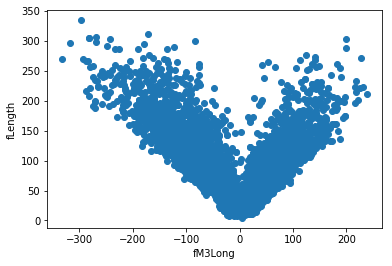

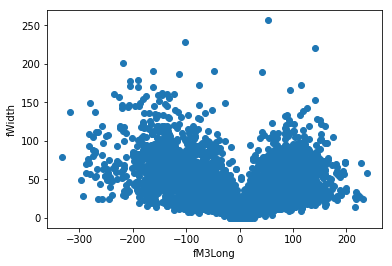

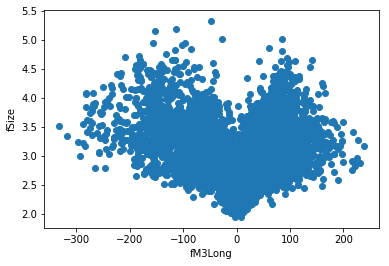

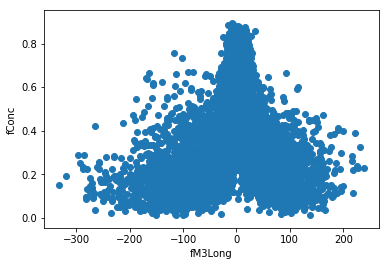

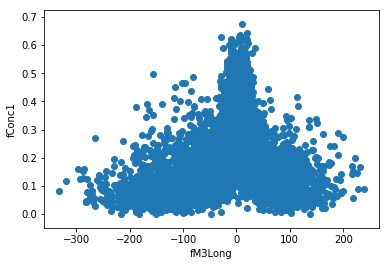

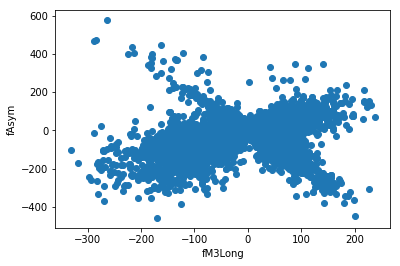

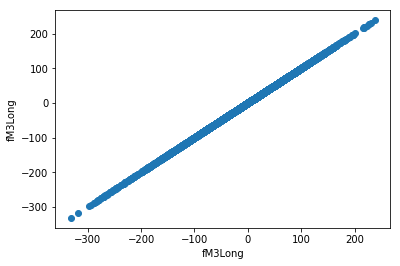

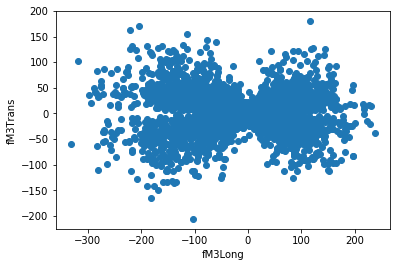

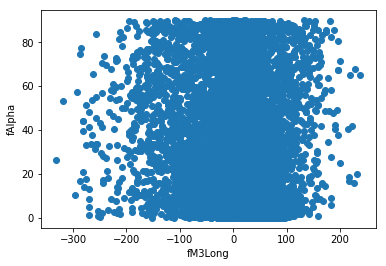

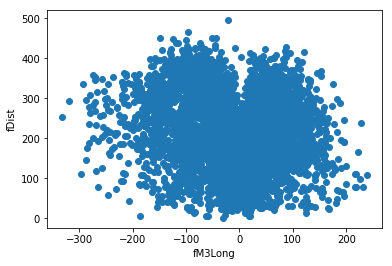

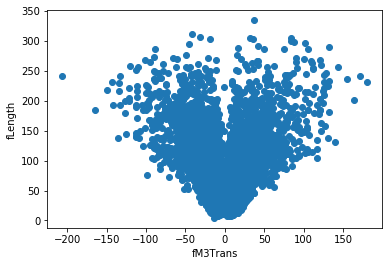

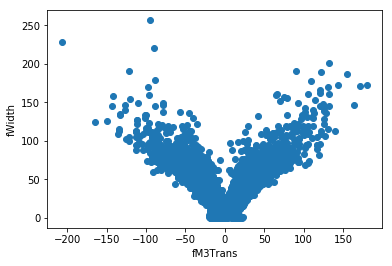

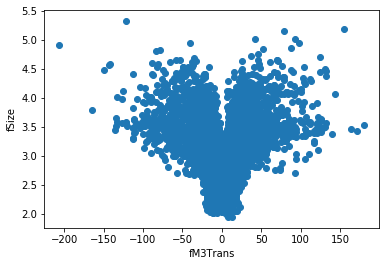

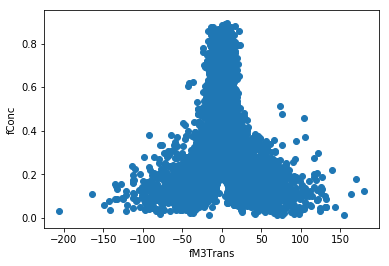

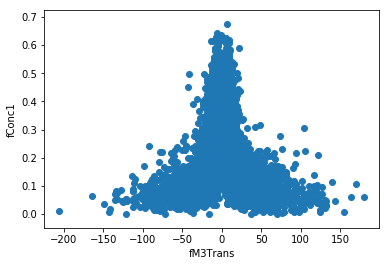

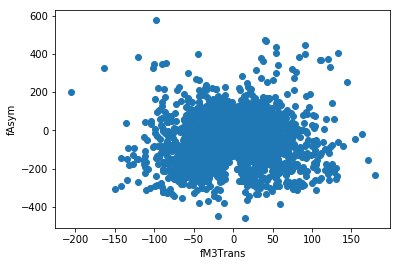

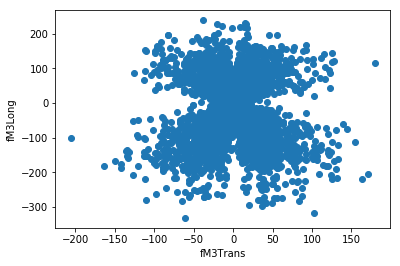

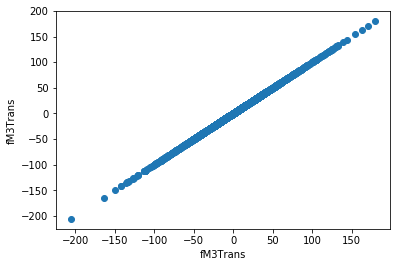

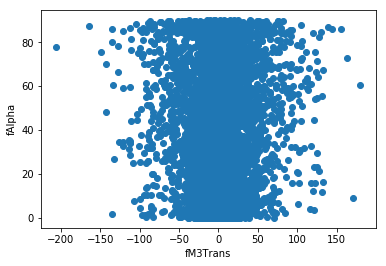

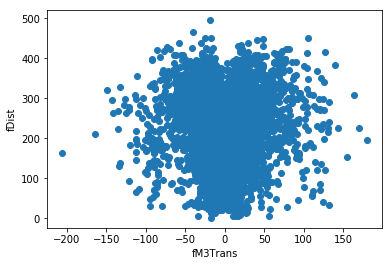

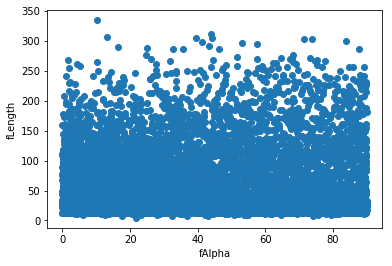

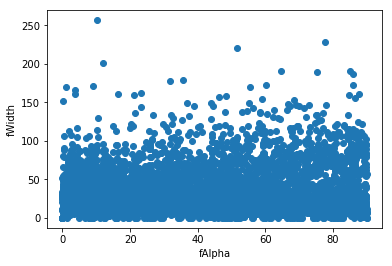

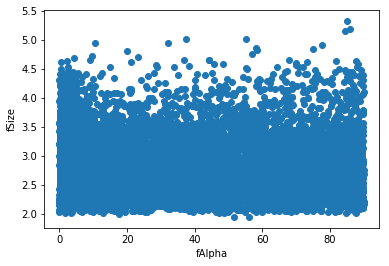

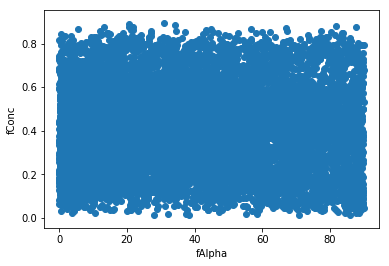

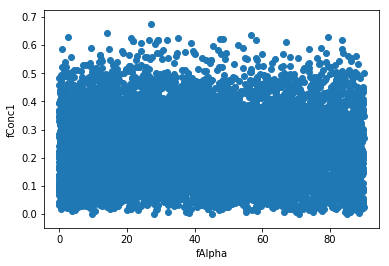

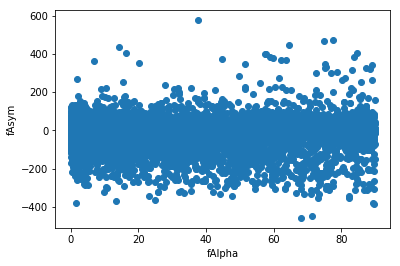

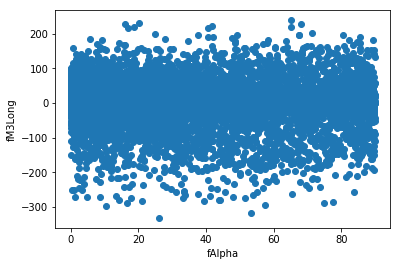

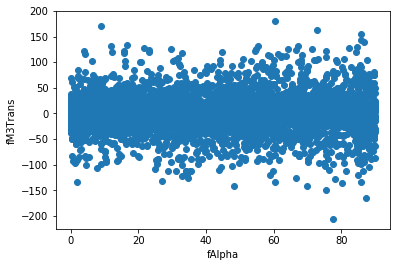

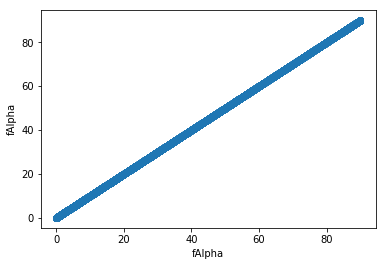

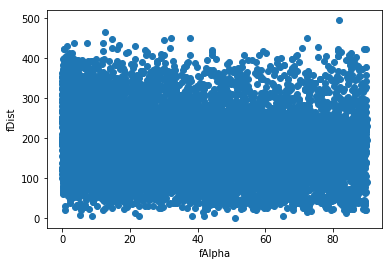

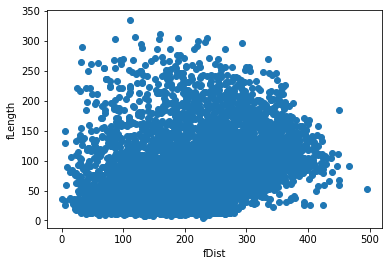

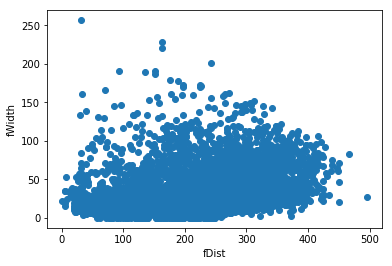

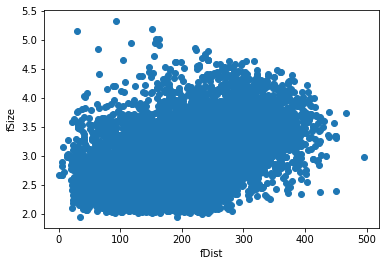

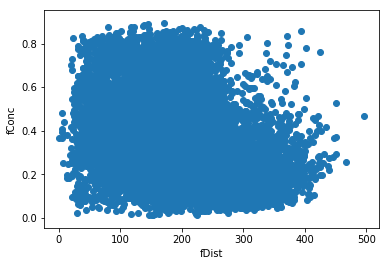

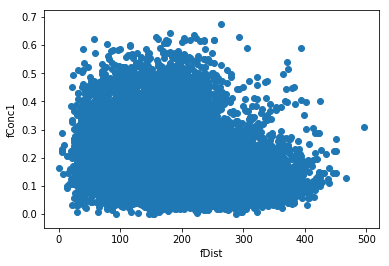

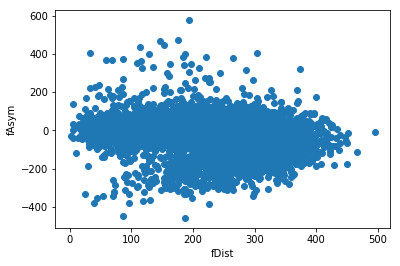

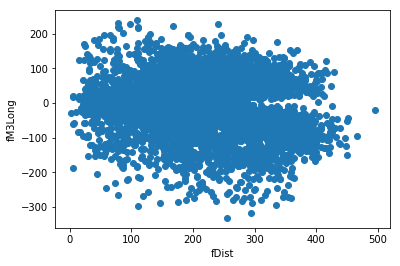

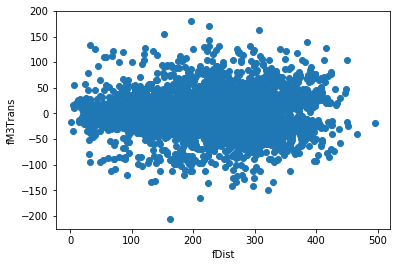

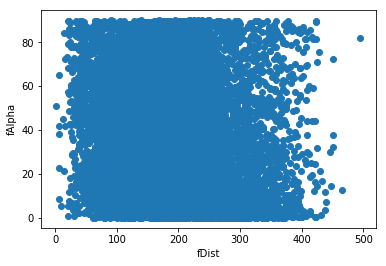

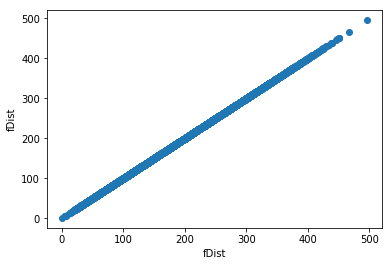

In [17]:
#scatter plot
for feature1 in telescope_balanced:
    for feature2 in telescope_balanced:
        if feature1 != "class" and feature2 != "class":
            plt.scatter(telescope_balanced[feature1], telescope_balanced[feature2])
            plt.xlabel(feature1)
            plt.ylabel(feature2);
            plt.show()

class
g    Axes(0.125,0.125;0.775x0.755)
h    Axes(0.125,0.125;0.775x0.755)
dtype: object

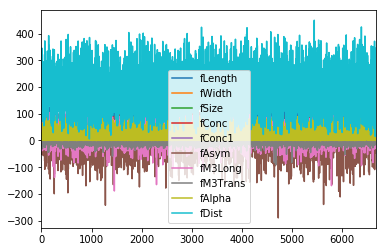

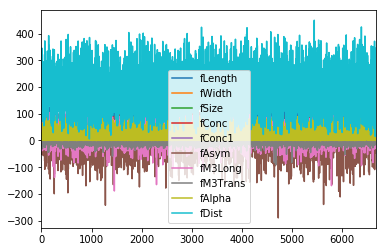

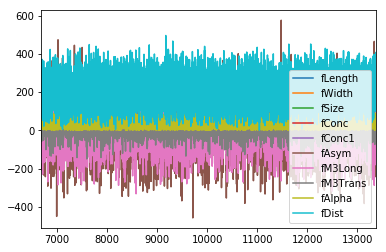

In [20]:
#line plot
telescope_balanced_grouped.plot.line()

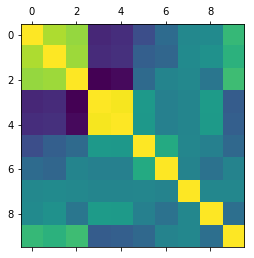

In [22]:
#correlation matrix
plt.matshow(telescope_balanced.corr())

# Classification :

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
        
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


### Decision Tree

##### Before pre-processing

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf_Decision_Tree = DecisionTreeClassifier(max_depth=20)
clf_Decision_Tree.fit(X=X_train,y=Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

              precision    recall  f1-score   support

           g       0.79      0.81      0.80      1984
           h       0.81      0.79      0.80      2029

   micro avg       0.80      0.80      0.80      4013
   macro avg       0.80      0.80      0.80      4013
weighted avg       0.80      0.80      0.80      4013

Accuracy Score : 0.7986543732868179


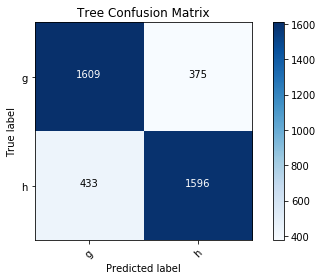

In [25]:
# Classification Report
Y_predicted = clf_Decision_Tree.predict(X=X_test)
print(classification_report(Y_test,Y_predicted))
print("Accuracy Score : " + str(accuracy_score(Y_test,Y_predicted)))

# Confusion Matrix
cnf_matrix = confusion_matrix(y_true=Y_test,y_pred=Y_predicted)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['g','h'], normalize=False,
                      title='Tree Confusion Matrix')



##### After pre-processing

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf_Decision_Tree = DecisionTreeClassifier(max_depth=20)
clf_Decision_Tree.fit(X=X_train,y=Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

              precision    recall  f1-score   support

           g       0.79      0.81      0.80      1984
           h       0.81      0.79      0.80      2029

   micro avg       0.80      0.80      0.80      4013
   macro avg       0.80      0.80      0.80      4013
weighted avg       0.80      0.80      0.80      4013

Accuracy Score : 0.800647894343384


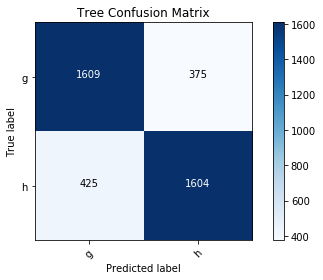

In [41]:
# Classification Report
Y_predicted = clf_Decision_Tree.predict(X=X_test)
print(classification_report(Y_test,Y_predicted))
print("Accuracy Score : " + str(accuracy_score(Y_test,Y_predicted)))

# Confusion Matrix
cnf_matrix = confusion_matrix(y_true=Y_test,y_pred=Y_predicted)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['g','h'], normalize=False,
                      title='Tree Confusion Matrix')



### Naive Bayes

##### Before pre-processing

In [26]:
from sklearn.naive_bayes import GaussianNB
clf_Naive_Bayes = GaussianNB()
clf_Naive_Bayes.fit(X=X_train, y=Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

              precision    recall  f1-score   support

           g       0.60      0.89      0.71      1984
           h       0.79      0.41      0.54      2029

   micro avg       0.65      0.65      0.65      4013
   macro avg       0.69      0.65      0.63      4013
weighted avg       0.70      0.65      0.63      4013

Accuracy Score : 0.6473959631198605


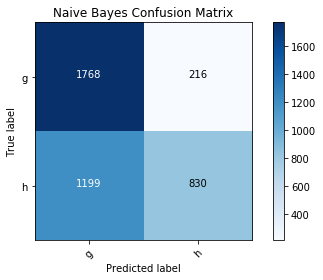

In [27]:
# Classification Report
Y_predicted = clf_Naive_Bayes.predict(X=X_test)
print(classification_report(Y_test,Y_predicted))
print("Accuracy Score : " + str(accuracy_score(Y_test,Y_predicted)))


# Confusion Matrix
cnf_matrix = confusion_matrix(y_true=Y_test,y_pred=Y_predicted)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['g','h'], normalize=False,
                      title='Naive Bayes Confusion Matrix')

##### After pre-processing

In [42]:
from sklearn.naive_bayes import GaussianNB
clf_Naive_Bayes = GaussianNB()
clf_Naive_Bayes.fit(X=X_train, y=Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

              precision    recall  f1-score   support

           g       0.60      0.89      0.71      1984
           h       0.79      0.41      0.54      2029

   micro avg       0.65      0.65      0.65      4013
   macro avg       0.69      0.65      0.63      4013
weighted avg       0.70      0.65      0.63      4013

Accuracy Score : 0.6473959631198605


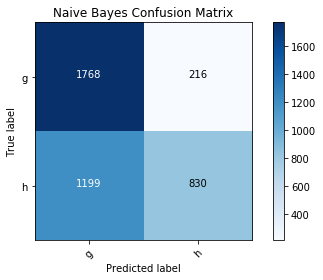

In [43]:
# Classification Report
Y_predicted = clf_Naive_Bayes.predict(X=X_test)
print(classification_report(Y_test,Y_predicted))
print("Accuracy Score : " + str(accuracy_score(Y_test,Y_predicted)))


# Confusion Matrix
cnf_matrix = confusion_matrix(y_true=Y_test,y_pred=Y_predicted)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['g','h'], normalize=False,
                      title='Naive Bayes Confusion Matrix')

### For Parameter Tuning with Classifiers

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,f1_score

### Ada-Boost

##### Before pre-processing

In [29]:
from sklearn.ensemble import AdaBoostClassifier

# Parameter Tuning starts here
ranges_for_estimators = list(range(10,120,20))
parameters = {'n_estimators':ranges_for_estimators}
sc=make_scorer(f1_score)
grid = GridSearchCV(AdaBoostClassifier(),parameters,scoring=sc , cv= 5 )

# Binarising the labels
to_bin = {'h':0 , 'g':1}
Y_train_bin = Y_train.map(to_bin, na_action='ignore')

        
grid_fit = grid.fit(X_train,Y_train_bin)
clf_Ada_Boost = grid_fit.best_estimator_


              precision    recall  f1-score   support

           g       0.82      0.83      0.83      1984
           h       0.83      0.82      0.83      2029

   micro avg       0.83      0.83      0.83      4013
   macro avg       0.83      0.83      0.83      4013
weighted avg       0.83      0.83      0.83      4013

Accuracy Score : 0.8273112384749564


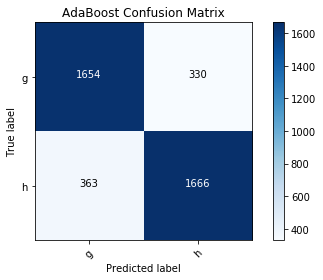

In [30]:
# Classification Report
Y_predicted = clf_Ada_Boost.predict(X=X_test)

# Nominalize the labels 
Y_predicted = pd.DataFrame(Y_predicted, dtype='str')[0]
to_name = {'0':'h','1' :'g'}
Y_predicted = Y_predicted.map(to_name, na_action='ignore')


print(classification_report(Y_test,Y_predicted))
print("Accuracy Score : " + str(accuracy_score(Y_test,Y_predicted)))


# Confusion Matrix
cnf_matrix = confusion_matrix(y_true=Y_test,y_pred=Y_predicted)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['g','h'], normalize=False,
                      title='AdaBoost Confusion Matrix')

##### After pre-processing

In [44]:
from sklearn.ensemble import AdaBoostClassifier

# Parameter Tuning starts here
ranges_for_estimators = list(range(10,120,20))
parameters = {'n_estimators':ranges_for_estimators}
sc=make_scorer(f1_score)
grid = GridSearchCV(AdaBoostClassifier(),parameters,scoring=sc , cv= 5 )

# Binarising the labels
to_bin = {'h':0 , 'g':1}
Y_train_bin = Y_train.map(to_bin, na_action='ignore')

        
grid_fit = grid.fit(X_train,Y_train_bin)
clf_Ada_Boost = grid_fit.best_estimator_


              precision    recall  f1-score   support

           g       0.82      0.83      0.83      1984
           h       0.83      0.82      0.83      2029

   micro avg       0.83      0.83      0.83      4013
   macro avg       0.83      0.83      0.83      4013
weighted avg       0.83      0.83      0.83      4013

Accuracy Score : 0.8273112384749564


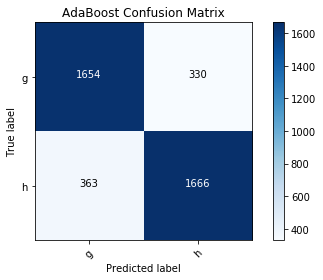

In [45]:
# Classification Report
Y_predicted = clf_Ada_Boost.predict(X=X_test)

# Nominalize the labels 
Y_predicted = pd.DataFrame(Y_predicted, dtype='str')[0]
to_name = {'0':'h','1' :'g'}
Y_predicted = Y_predicted.map(to_name, na_action='ignore')


print(classification_report(Y_test,Y_predicted))
print("Accuracy Score : " + str(accuracy_score(Y_test,Y_predicted)))


# Confusion Matrix
cnf_matrix = confusion_matrix(y_true=Y_test,y_pred=Y_predicted)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['g','h'], normalize=False,
                      title='AdaBoost Confusion Matrix')

### K- Nearest Neighbour

##### Before pre-processing

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Parameter Tuning starts here
ranges_for_estimators = list(range(2,20,1))
parameters = {'n_neighbors':ranges_for_estimators}
sc=make_scorer(f1_score)
grid = GridSearchCV(KNeighborsClassifier(),parameters,scoring=sc , cv= 5 )

        
grid_fit = grid.fit(X_train,Y_train_bin)
clf_KNN = grid_fit.best_estimator_


              precision    recall  f1-score   support

           g       0.72      0.88      0.79      1984
           h       0.85      0.67      0.75      2029

   micro avg       0.77      0.77      0.77      4013
   macro avg       0.79      0.77      0.77      4013
weighted avg       0.79      0.77      0.77      4013

Accuracy Score : 0.7732369798155994


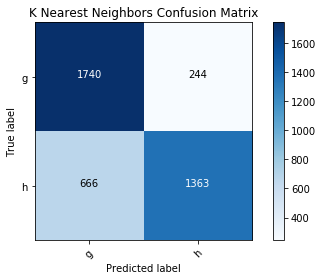

In [32]:
# Classification Report
Y_predicted = clf_KNN.predict(X=X_test)

# Nominalize the labels 
Y_predicted = pd.DataFrame(Y_predicted, dtype='str')[0]
to_name = {'0':'h','1' :'g'}
Y_predicted = Y_predicted.map(to_name, na_action='ignore')


print(classification_report(Y_test,Y_predicted))
print("Accuracy Score : " + str(accuracy_score(Y_test,Y_predicted)))


# Confusion Matrix
cnf_matrix = confusion_matrix(y_true=Y_test,y_pred=Y_predicted)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['g','h'], normalize=False,
                      title='K Nearest Neighbors Confusion Matrix')

##### After pre-processing

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Parameter Tuning starts here
ranges_for_estimators = list(range(2,20,1))
parameters = {'n_neighbors':ranges_for_estimators}
sc=make_scorer(f1_score)
grid = GridSearchCV(KNeighborsClassifier(),parameters,scoring=sc , cv= 5 )

        
grid_fit = grid.fit(X_train,Y_train_bin)
clf_KNN = grid_fit.best_estimator_


              precision    recall  f1-score   support

           g       0.76      0.90      0.83      1984
           h       0.88      0.73      0.80      2029

   micro avg       0.81      0.81      0.81      4013
   macro avg       0.82      0.81      0.81      4013
weighted avg       0.82      0.81      0.81      4013

Accuracy Score : 0.8136057812110641


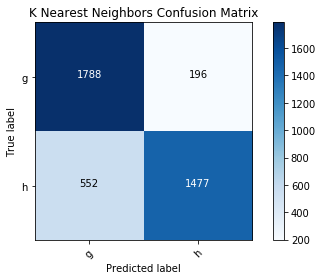

In [47]:
# Classification Report
Y_predicted = clf_KNN.predict(X=X_test)

# Nominalize the labels 
Y_predicted = pd.DataFrame(Y_predicted, dtype='str')[0]
to_name = {'0':'h','1' :'g'}
Y_predicted = Y_predicted.map(to_name, na_action='ignore')


print(classification_report(Y_test,Y_predicted))
print("Accuracy Score : " + str(accuracy_score(Y_test,Y_predicted)))


# Confusion Matrix
cnf_matrix = confusion_matrix(y_true=Y_test,y_pred=Y_predicted)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['g','h'], normalize=False,
                      title='K Nearest Neighbors Confusion Matrix')

### Random Forests

##### Before pre-processing

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Parameter Tuning starts here
ranges_for_estimators = list(range(50,200,20))
parameters = {'n_estimators':ranges_for_estimators}
sc=make_scorer(f1_score)
grid = GridSearchCV(RandomForestClassifier(),parameters,scoring=sc , cv= 5 )

        
grid_fit = grid.fit(X_train,Y_train_bin)
clf_Rand_Forest= grid_fit.best_estimator_


              precision    recall  f1-score   support

           g       0.84      0.88      0.86      1984
           h       0.88      0.84      0.86      2029

   micro avg       0.86      0.86      0.86      4013
   macro avg       0.86      0.86      0.86      4013
weighted avg       0.86      0.86      0.86      4013

Accuracy Score : 0.8599551457762272


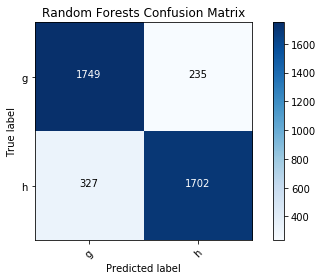

In [34]:
# Classification Report
Y_predicted = clf_Rand_Forest.predict(X=X_test)

# Nominalize the labels 
Y_predicted = pd.DataFrame(Y_predicted, dtype='str')[0]
to_name = {'0':'h','1' :'g'}
Y_predicted = Y_predicted.map(to_name, na_action='ignore')


print(classification_report(Y_test,Y_predicted))
print("Accuracy Score : " + str(accuracy_score(Y_test,Y_predicted)))


# Confusion Matrix
cnf_matrix = confusion_matrix(y_true=Y_test,y_pred=Y_predicted)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['g','h'], normalize=False,
                      title='Random Forests Confusion Matrix')

##### After pre-processing

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Parameter Tuning starts here
ranges_for_estimators = list(range(50,200,20))
parameters = {'n_estimators':ranges_for_estimators}
sc=make_scorer(f1_score)
grid = GridSearchCV(RandomForestClassifier(),parameters,scoring=sc , cv= 5 )

        
grid_fit = grid.fit(X_train,Y_train_bin)
clf_Rand_Forest= grid_fit.best_estimator_


              precision    recall  f1-score   support

           g       0.85      0.88      0.86      1984
           h       0.88      0.84      0.86      2029

   micro avg       0.86      0.86      0.86      4013
   macro avg       0.86      0.86      0.86      4013
weighted avg       0.86      0.86      0.86      4013

Accuracy Score : 0.8631946174931473


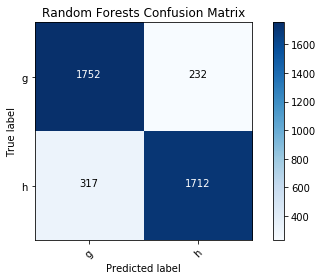

In [49]:
# Classification Report
Y_predicted = clf_Rand_Forest.predict(X=X_test)

# Nominalize the labels 
Y_predicted = pd.DataFrame(Y_predicted, dtype='str')[0]
to_name = {'0':'h','1' :'g'}
Y_predicted = Y_predicted.map(to_name, na_action='ignore')


print(classification_report(Y_test,Y_predicted))
print("Accuracy Score : " + str(accuracy_score(Y_test,Y_predicted)))


# Confusion Matrix
cnf_matrix = confusion_matrix(y_true=Y_test,y_pred=Y_predicted)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['g','h'], normalize=False,
                      title='Random Forests Confusion Matrix')

### Support Vector Machines (SVM)

##### Before pre-processing

In [35]:
from sklearn.svm import LinearSVC

# Parameter Tuning starts here
# x / 1.0 for x in range(10, 200, 50)
ranges_for_estimators = [x / 10.0 for x in range(10, 200, 10)]
parameters = {'C':ranges_for_estimators}
sc=make_scorer(f1_score)
grid = GridSearchCV(LinearSVC(),parameters,scoring=sc , cv= 5 )

        
grid_fit = grid.fit(X_train,Y_train_bin)
clf_SVM= grid_fit.best_estimator_


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           g       0.52      0.99      0.68      1984
           h       0.92      0.12      0.21      2029

   micro avg       0.55      0.55      0.55      4013
   macro avg       0.72      0.55      0.45      4013
weighted avg       0.72      0.55      0.44      4013

Accuracy Score : 0.548218290555694


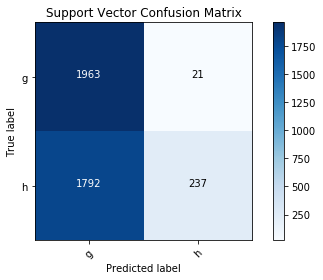

In [36]:
# Classification Report
Y_predicted = clf_SVM.predict(X=X_test)

# Nominalize the labels 
Y_predicted = pd.DataFrame(Y_predicted, dtype='str')[0]
to_name = {'0':'h','1' :'g'}
Y_predicted = Y_predicted.map(to_name, na_action='ignore')


print(classification_report(Y_test,Y_predicted))
print("Accuracy Score : " + str(accuracy_score(Y_test,Y_predicted)))


# Confusion Matrix
cnf_matrix = confusion_matrix(y_true=Y_test,y_pred=Y_predicted)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['g','h'], normalize=False,
                      title='Support Vector Confusion Matrix')

##### After pre-processing

In [51]:
from sklearn.svm import LinearSVC

# Parameter Tuning starts here

ranges_for_estimators = [ x / 1.0 for x in range(10, 200, 10)]
parameters = {'C':ranges_for_estimators }
sc=make_scorer(f1_score)
grid = GridSearchCV(LinearSVC(),parameters,scoring=sc , cv= 5 )

        
grid_fit = grid.fit(X_train,Y_train_bin)
clf_SVM= grid_fit.best_estimator_


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           g       0.75      0.83      0.79      1984
           h       0.81      0.73      0.77      2029

   micro avg       0.78      0.78      0.78      4013
   macro avg       0.78      0.78      0.78      4013
weighted avg       0.78      0.78      0.78      4013

Accuracy Score : 0.7777224021928731


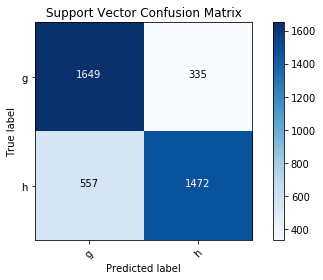

In [52]:
# Classification Report
Y_predicted = clf_SVM.predict(X=X_test)

# Nominalize the labels 
Y_predicted = pd.DataFrame(Y_predicted, dtype='str')[0]
to_name = {'0':'h','1' :'g'}
Y_predicted = Y_predicted.map(to_name, na_action='ignore')


print(classification_report(Y_test,Y_predicted))
print("Accuracy Score : " + str(accuracy_score(Y_test,Y_predicted)))


# Confusion Matrix
cnf_matrix = confusion_matrix(y_true=Y_test,y_pred=Y_predicted)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['g','h'], normalize=False,
                      title='Support Vector Confusion Matrix')

# Comparison Graph

In [68]:
#plot the comparison
def comp(algo_names, pre, post, title):
    fig, ax = plt.subplots()
    algo_numbers = [1,2,3,4,5,6]
    plt.xticks(algo_numbers, algo_names)
    plt.plot(algo_numbers, pre)
    plt.plot(algo_numbers, post)
    ax.set(xlabel='Classifiers', ylabel='Accuracy',
       title=title)
    ax.grid()
    plt.show()

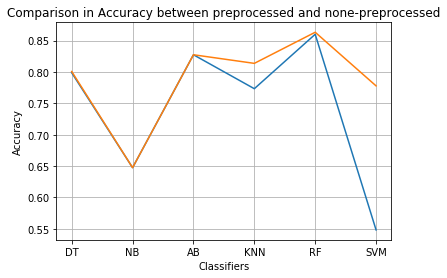

In [69]:
algo_names = ['DT','NB','AB','KNN','RF','SVM']
accuracy_before = [0.7986543732868179,0.6473959631198605,0.8273112384749564,0.7732369798155994,0.8599551457762272,0.548218290555694]
accuracy_after = [0.800647894343384,0.6473959631198605,0.8273112384749564,0.8136057812110641,0.8631946174931473,0.7777224021928731]
comp(algo_names,accuracy_before,accuracy_after,'Comparison in Accuracy between preprocessed and none-preprocessed')